# Exploratory Data Analysis and Introduction

## Goals:

1. Top paying skills and roles in Data Scince Industry
2. Explore real life data set on job postings using Python

## Roles to Explore

In [1]:
# importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns

# loading data set
df = pd.read_csv("C:\\Users\\Dell\\Documents\\VSCODE\\Python\\Data Analysis\\Data\\data_jobs.csv")

# data cleaning
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x : literal_eval(x) if pd.notna(x) else x)

## Filter Data for Desired Role and Country

In [2]:
# filtering data
country = "United States"
role = "Data Analyst"

df_filtered = df[(df["job_title_short"] == role) & (df["job_country"] == country)]
df_filtered

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,NaN,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,NaN,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,NaN,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,NaN,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN


## Exploring Locations

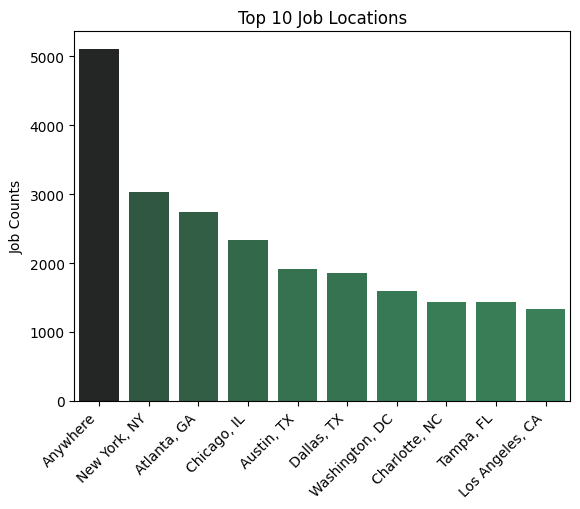

In [30]:
# Extracting counts of location
df_vis = df_filtered["job_location"].value_counts().head(10).to_frame()

# Visualizing
sns.barplot(
    data = df_vis,
    x = df_vis.index,
    y = df_vis["count"],
    hue = df_vis["count"],
    palette = "dark:seagreen_r",
    legend = False
)
plt.xlabel("")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.ylabel("Job Counts")
plt.title("Top 10 Job Locations")
plt.show()

## Exploring Boolean columns

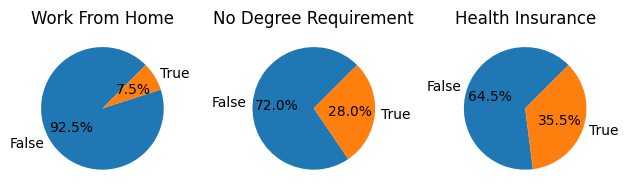

<function matplotlib.pyplot.pie(x: 'ArrayLike', *, explode: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, colors: 'ColorType | Sequence[ColorType] | None' = None, autopct: 'str | Callable[[float], str] | None' = None, pctdistance: 'float' = 0.6, shadow: 'bool' = False, labeldistance: 'float | None' = 1.1, startangle: 'float' = 0, radius: 'float' = 1, counterclock: 'bool' = True, wedgeprops: 'dict[str, Any] | None' = None, textprops: 'dict[str, Any] | None' = None, center: 'tuple[float, float]' = (0, 0), frame: 'bool' = False, rotatelabels: 'bool' = False, normalize: 'bool' = True, hatch: 'str | Sequence[str] | None' = None, data=None) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'>

In [31]:
# filtering data
df_bool_col = df_filtered[["job_work_from_home", "job_no_degree_mention", "job_health_insurance"]]
title = ["Work From Home", "No Degree Requirement", "Health Insurance"]

# visalizing 
fig, ax = plt.subplots(1,3)

for i, col in enumerate(df_bool_col.columns) :
    ax[i].pie(
        x = df_bool_col[col].value_counts(),
        autopct = "%1.1f%%",
        labels = ["False", "True"],
        startangle = 45
    )
    ax[i].set_title(title[i])
plt.tight_layout()
plt.show()
plt.pie

## Top 10 Companies

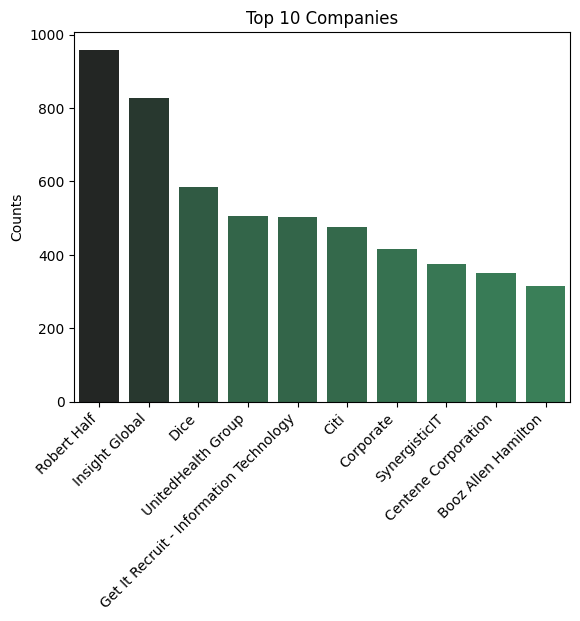

In [29]:
# Ectractiong top 10 companies
top_companies = df_filtered["company_name"].value_counts().head(10).to_frame()

# Visualizing
sns.barplot(
    data = top_companies,
    x = top_companies.index,
    y = top_companies["count"],
    hue = top_companies["count"],
    palette = "dark:seagreen_r",
    legend = False
)
plt.xlabel("")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.ylabel("Counts")
plt.title("Top 10 Companies")
plt.show()

## Top 10 Platforms

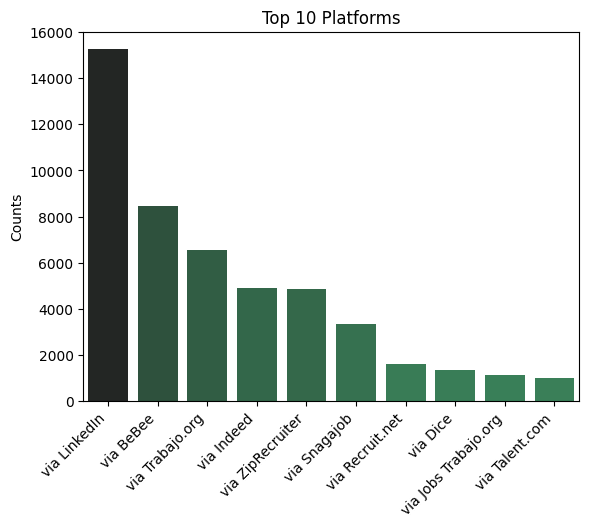

In [32]:
# Ectractiong top 10 companies
top_platforms = df_filtered["job_via"].value_counts().head(10).to_frame()

# Visualizing
sns.barplot(
    data = top_platforms,
    x = top_platforms.index,
    y = top_platforms["count"],
    hue = top_platforms["count"],
    palette = "dark:seagreen_r",
    legend = False
)
plt.xlabel("")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.ylabel("Counts")
plt.title("Top 10 Platforms")
plt.show()